In [1]:
# 必要なライブラリのインポート
import datetime

import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

%matplotlib inline

In [2]:
# 銘柄の読み込み
stock_code = pd.read_csv('stock_codes.csv')
stock_code

,コード,銘柄名
0,1301,極洋
1,1305,ダイワ上場投信－トピックス
2,1306,ＮＥＸＴ ＦＵＮＤＳ ＴＯＰＩＸ連動型上場投信
3,1308,上場インデックスファンドＴＯＰＩＸ
4,1309,ＮＥＸＴ ＦＵＮＤＳ ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信
...,...,...
4241,9993,ヤマザワ
4242,9994,やまや
4243,9995,グローセル
4244,9996,サトー商会


In [3]:
# 株価コード探索
search = 'ソニー'
stock_code[stock_code['銘柄名'].str.contains(search)]

,コード,銘柄名
2720,6758,ソニーグループ


In [4]:
# 1　株価取得
start = '2010-01-01'
end = '2022-12-31'
ticker = '6758.T'

df = yf.download(ticker, start, end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04 00:00:00+09:00,2700.0,2744.0,2694.0,2731.0,2425.539307,4004500
2010-01-05 00:00:00+09:00,2781.0,2782.0,2704.0,2719.0,2414.881592,4894300
2010-01-06 00:00:00+09:00,2719.0,2757.0,2699.0,2743.0,2436.197021,4270900
2010-01-07 00:00:00+09:00,2749.0,2764.0,2723.0,2743.0,2436.197021,2899600
2010-01-08 00:00:00+09:00,2780.0,2809.0,2769.0,2809.0,2494.815186,6981100


## 単純利益率
- 同じ時間軸に限り複数の資産を比較できる
- 投資期間が短い場合や、比較する投資商品の収益性に大きな差がある場合には、対数利益率よりも単純利益率の方が適切
$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

In [5]:
# 2
# 数式通りに変数を格納
P0 = df[["Adj Close"]].shift(1)
P1 = df[["Adj Close"]]

# 日当たりの収益率を算出
df['simple_return'] = ((P1 / P0) - 1)
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return
Date,,,,,,,
2010-01-04 00:00:00+09:00,2700.0,2744.0,2694.0,2731.0,2425.539307,4004500,NaN
2010-01-05 00:00:00+09:00,2781.0,2782.0,2704.0,2719.0,2414.881592,4894300,-0.004394
2010-01-06 00:00:00+09:00,2719.0,2757.0,2699.0,2743.0,2436.197021,4270900,0.008827
2010-01-07 00:00:00+09:00,2749.0,2764.0,2723.0,2743.0,2436.197021,2899600,0.000000
2010-01-08 00:00:00+09:00,2780.0,2809.0,2769.0,2809.0,2494.815186,6981100,0.024061


In [8]:
# 3
# 日当たり平均単純利益率（日別の収益率の平均）
day_avg_return = df['simple_return'].mean()
day_avg_return

0.0006806652706315123

In [9]:
# 4
# 年の営業日の平均を算出する。
int(df.resample('Y').count()['Adj Close'].mean())

246

In [10]:
# 5
# 年間の単純利益率を計算（日当たり単純利益率✖️246日）
day_avg_return * 246

0.16744365657535204

## 対数利益率
- 複数の投資商品を比較する場合や長期間の投資収益性を分析する場合に使用される
- 各商品の投資期間が異なる場合でも、対数利益率を計算することで、期間中の平均利益率を正確に表すことができる。（ただし、期間中に起きた重要なイベントや変動について考慮する必要あり）
$$
ln(\frac{P_1}{P_{0}})
$$

In [157]:
# 6
P0 = df[["Adj Close"]].shift(1)
P1 = df[["Adj Close"]]

df['log_return'] = np.log(P1 / P0)
df.head()

,Open,High,Low,Close,Adj Close,Volume,simple_return,log_return
Date,,,,,,,,
2010-01-04 00:00:00+09:00,2700.0,2744.0,2694.0,2731.0,2425.539795,4004500,NaN,NaN
2010-01-05 00:00:00+09:00,2781.0,2782.0,2704.0,2719.0,2414.881592,4894300,-0.004394,-0.004404
2010-01-06 00:00:00+09:00,2719.0,2757.0,2699.0,2743.0,2436.197021,4270900,0.008827,0.008788
2010-01-07 00:00:00+09:00,2749.0,2764.0,2723.0,2743.0,2436.197021,2899600,0.000000,0.000000
2010-01-08 00:00:00+09:00,2780.0,2809.0,2769.0,2809.0,2494.815918,6981100,0.024062,0.023777


In [158]:
# 7 対数利益率の計算(日平均)
day_log_return = df['log_return'].mean()
day_log_return

0.00044389649477510293

In [159]:
# 年間の単純利益率を計算（日当たり単純利益率✖️246日）
day_log_return * 246

0.10919853771467532

## 複数の銘柄を所持した場合の利益率
- 個別の株式利益率に、それぞれ重み（持っている比率）を掛けること

In [160]:
# コードの探索
search = 'くら'
stock_code[stock_code['銘柄名'].str.contains(search)]

,コード,銘柄名
678,2695,くら寿司
1277,3778,さくらインターネット
1868,4761,さくらケーシーエス
2920,7097,さくらさくプラス


In [161]:
# 9
# ソニー、 トヨタ自動車、　ヤクルト、 くら寿司
start = '2010-01-01'
end = '2022-12-31'
tickers = {'ソニーグループ':'6758.T', 'トヨタ自動車':'7203.T', 'ヤクルト':'2267.T', 'くら寿司':'2695.T'}

df = pd.DataFrame()
for ticker, number in tickers.items():
    df[ticker] = yf.download(number, start, end)['Adj Close']

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04 00:00:00+09:00,2425.539307,514.702698,2612.402588,566.271057
2010-01-05 00:00:00+09:00,2414.881348,503.455963,2580.230469,575.244873
2010-01-06 00:00:00+09:00,2436.197021,515.364258,2584.826416,590.431274
2010-01-07 00:00:00+09:00,2436.197021,509.409851,2481.875000,596.183838
2010-01-08 00:00:00+09:00,2494.815918,523.964661,2470.843994,580.767212


### 株価の値上がり率を比較

<AxesSubplot:xlabel='Date'>

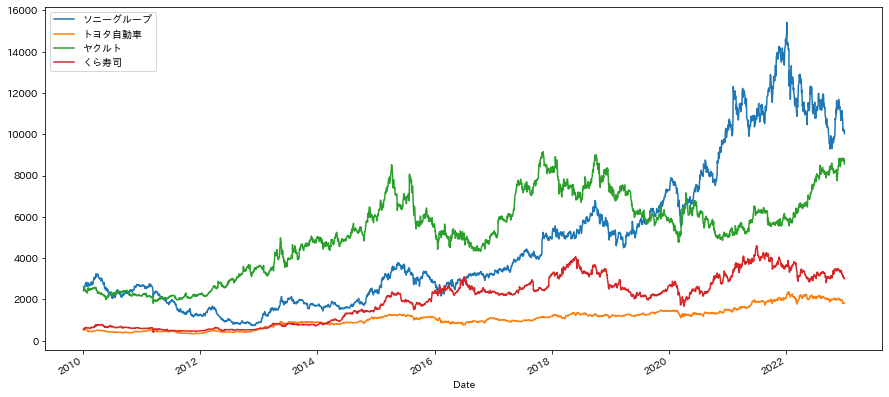

In [162]:
# 10 悪い例
# 正規化をしない場合の利益率は、初日がバラバラなため、上昇率が定量的に測定できない
df.plot(figsize=(15, 7))

上記ではソニーグループが一番上昇しているように見えるが・・・

<AxesSubplot:xlabel='Date'>

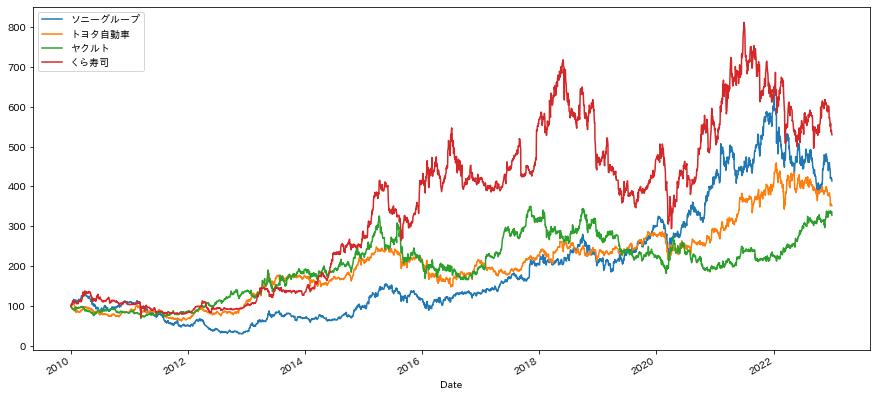

In [91]:
# 11 良い例
# 正規化(今回は初期値を100で統一するため、＊100をする)
# それぞれの値を初日＊100で割る。
(df / df.iloc[0]*100).plot(figsize=(15, 7))

本当はくら寿司の方が上昇している。

In [92]:
#12 単純利益率を計算
P0 = df.shift(1)
P1 = df

# 銘柄別のデータフレームを日別の収益率を算出
df = ((P1 / P0) - 1)
df.head()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04 00:00:00+09:00,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+09:00,-0.004394,-0.021851,-0.012315,0.015847
2010-01-06 00:00:00+09:00,0.008827,0.023653,0.001781,0.026400
2010-01-07 00:00:00+09:00,0.000000,-0.011553,-0.039829,0.009743
2010-01-08 00:00:00+09:00,0.024061,0.028571,-0.004445,-0.025859


In [93]:
#13 単純利益率（日平均）を計算
df.mean()

ソニーグループ    0.000681
トヨタ自動車     0.000524
ヤクルト       0.000540
くら寿司       0.000726
dtype: float64

In [94]:
#13 単純利益率（年）を計算
df.mean()*246

ソニーグループ    0.167444
トヨタ自動車     0.128950
ヤクルト       0.132884
くら寿司       0.178618
dtype: float64

In [95]:
#14 np.dot: ベクトル、行列の内積計算
w = np.array([0.25, 0.25, 0.25, 0.25]) #重み
np.dot(df.mean()*246, w) #

0.15197407422749667

In [97]:
#15 保有割合を変更してみる。
w = np.array([0.3, 0.1, 0.2, 0.4])
np.dot(df.mean()*246, w)

0.16115228811263277

## マーケットインデックス
- 分散投資された指標
- 個別の株式との比較に扱う
- https://finance.yahoo.com/world-indices

マーケットインデックスに勝てる指標を探してみよう

In [164]:
# 16
# 日経225, sp500, インド（NIFTY 50）
start = '2010-01-01'
end = '2020-12-31'
tickers = {'日経225':'^N225', 'S&P':'^GSPC' ,'インド':'^NSEI'}

df = pd.DataFrame()
df_list = []

for ticker, number in tickers.items():
    df[ticker] = yf.download(number, start, end)['Adj Close']
    # インデックスの時差がバラバラなため、日に統一する。
    df.index = df.index.date
    df_list.append(df)
    df = pd.DataFrame()
    
df = pd.concat(df_list, axis=1).sort_index()
df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,日経225,S&P,インド
2010-01-04,10654.790039,1132.989990,5232.200195
2010-01-05,10681.830078,1136.520020,5277.899902
2010-01-06,10731.450195,1137.140015,5281.799805
2010-01-07,10681.660156,1141.689941,5263.100098
2010-01-08,10798.320312,1144.979980,5244.750000


<AxesSubplot:>

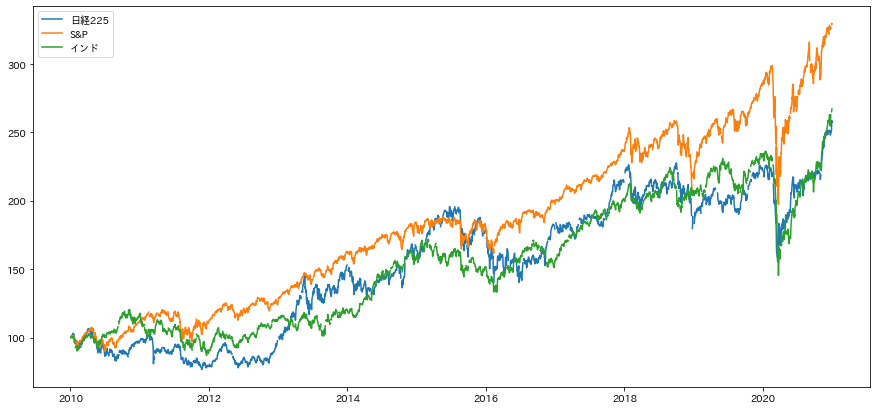

In [101]:
# 17 正規化後、グラフ表示
(df / df.iloc[0]*100).plot(figsize=(15, 7))

In [165]:
# 18
P0 = df.shift(1)
P1 = df

# 銘柄別のデータフレームを日別の収益率を算出
df = ((P1 / P0) - 1)
df.mean()*246

日経225    0.108353
S&P      0.118836
インド      0.088251
dtype: float64

## 個別株式のリスク（標準偏差)

In [178]:
# 2-1
# ソニー、 トヨタ自動車、　ヤクルト、 くら寿司
start = '2010-01-01'
end = '2022-12-31'
tickers = {'ソニーグループ':'6758.T', 'トヨタ自動車':'7203.T', 'ヤクルト':'2267.T', 'くら寿司':'2695.T'}

df = pd.DataFrame()
for ticker, number in tickers.items():
    df[ticker] = yf.download(number, start, end)['Adj Close']

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04 00:00:00+09:00,2425.539795,514.702637,2612.402344,566.270996
2010-01-05 00:00:00+09:00,2414.881592,503.455811,2580.229736,575.244934
2010-01-06 00:00:00+09:00,2436.197266,515.364197,2584.825928,590.431396
2010-01-07 00:00:00+09:00,2436.197266,509.410034,2481.874268,596.183838
2010-01-08 00:00:00+09:00,2494.815674,523.964722,2470.844482,580.767212


In [179]:
# 2-2
# 対数利益率
P0 = df.shift(1)
P1 = df

df = np.log(P1 / P0)
df.head()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04 00:00:00+09:00,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+09:00,-0.004404,-0.022093,-0.012392,0.015723
2010-01-06 00:00:00+09:00,0.008788,0.023378,0.001780,0.026058
2010-01-07 00:00:00+09:00,0.000000,-0.011621,-0.040644,0.009696
2010-01-08 00:00:00+09:00,0.023777,0.028171,-0.004454,-0.026199


In [180]:
# 2-3
df.mean() * 246

ソニーグループ    0.109199
トヨタ自動車     0.096806
ヤクルト       0.091266
くら寿司       0.128213
dtype: float64

$$
日当たりリスク（標本標準偏差）：\sigma = \sqrt{\frac{\sum_{i=1}^{n}(x_i-\bar{x})^2}{n-1}}
$$

In [181]:
# 2-4

# バイアス補正あり
print(df.std() * 246 ** 0.5)
print(np.std(df, ddof=1) * 246 ** 0.5)

print('----------------------')

# バイアス補正なし
print(df.std(ddof=0) * 246 ** 0.5)
print(np.std(df) * 246 ** 0.5)

ソニーグループ    0.341144
トヨタ自動車     0.253318
ヤクルト       0.288290
くら寿司       0.317969
dtype: float64
ソニーグループ    0.341144
トヨタ自動車     0.253318
ヤクルト       0.288290
くら寿司       0.317969
dtype: float64
----------------------
ソニーグループ    0.341090
トヨタ自動車     0.253278
ヤクルト       0.288245
くら寿司       0.317919
dtype: float64
ソニーグループ    0.341090
トヨタ自動車     0.253278
ヤクルト       0.288245
くら寿司       0.317919
dtype: float64


### 参考：スクラッチでソニーグループのリスクを実装

In [182]:
# 2-4
# 試しにソニーグループのリスクをスクラッチで実装
xi = df['ソニーグループ']
x_mean = df['ソニーグループ'].mean()
n = len(df['ソニーグループ'])

# 日当たりリスクの算出
sigma = np.sqrt(np.sum((xi - x_mean)**2) / (n-1))
#　年間リスクの算出(sigama * 246日　** 0.5)
sigma * 246 ** 0.5

0.3410902882976766

## 分散、共分散、相関係数

In [183]:
# 現在のデータフレームの中身を確認（対数利益率）
df.head()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04 00:00:00+09:00,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+09:00,-0.004404,-0.022093,-0.012392,0.015723
2010-01-06 00:00:00+09:00,0.008788,0.023378,0.001780,0.026058
2010-01-07 00:00:00+09:00,0.000000,-0.011621,-0.040644,0.009696
2010-01-08 00:00:00+09:00,0.023777,0.028171,-0.004454,-0.026199


## 分散(不偏)

$$
分散（不偏）：\operatorname{Var}(X) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

In [184]:
# 2-5 分散(日)を求める。
# バイアス補正あり
print(df.var())
print(np.var(df, ddof=1))

print('----------------------')

# バイアス補正なし
print(df.var(ddof=0))
print(np.var(df))

ソニーグループ    0.000473
トヨタ自動車     0.000261
ヤクルト       0.000338
くら寿司       0.000411
dtype: float64
ソニーグループ    0.000473
トヨタ自動車     0.000261
ヤクルト       0.000338
くら寿司       0.000411
dtype: float64
----------------------
ソニーグループ    0.000473
トヨタ自動車     0.000261
ヤクルト       0.000338
くら寿司       0.000411
dtype: float64
ソニーグループ    0.000473
トヨタ自動車     0.000261
ヤクルト       0.000338
くら寿司       0.000411
dtype: float64


In [185]:
# 2-6 分散(年)を求める。
# バイアス補正あり
print(df.var() * 246)
print(np.var(df, ddof=1) * 246)

print('----------------------')

#バイアス補正なし
print(df.var(ddof=0) * 246)
print(np.var(df) * 246)

ソニーグループ    0.116379
トヨタ自動車     0.064170
ヤクルト       0.083111
くら寿司       0.101104
dtype: float64
ソニーグループ    0.116379
トヨタ自動車     0.064170
ヤクルト       0.083111
くら寿司       0.101104
dtype: float64
----------------------
ソニーグループ    0.116343
トヨタ自動車     0.064150
ヤクルト       0.083085
くら寿司       0.101073
dtype: float64
ソニーグループ    0.116343
トヨタ自動車     0.064150
ヤクルト       0.083085
くら寿司       0.101073
dtype: float64


### 参考：ソニーグループの分散(不偏)をスクラッチで実装

In [175]:
# ソニーグループの分散をスクラッチで実装
xi = df['ソニーグループ']
x_mean = df['ソニーグループ'].mean()
n = len(df['ソニーグループ'])

# 日当たりリスクの算出
sigma = np.sum((xi - x_mean)**2) / (n-1)
print(sigma)
#　年間リスクの算出(sigama * 246日　)
print(sigma * 246)

0.00047293770010271407
0.11634267422526766


## 共分散

$$
共分散（不偏）：\operatorname{cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})
$$

### ソニーグループとトヨタの共分散をスクラッチで実装

In [186]:
# 2-7
# ソニーグループとトヨタの共分散（日）を算出
x = df['ソニーグループ'] - df['ソニーグループ'].mean()
y = df['トヨタ自動車'] - df['トヨタ自動車'].mean()
n = len(df)
np.sum(x * y) / (n-1)

0.00018146322559709345

## 共分散行列

\begin{eqnarray*}
共分散行列: \  \   
\Sigma = \begin{bmatrix}
        \sigma_{1}^2 \ \sigma_{12} \ \dots \ \sigma_{1I} \\
        \sigma_{21} \ \sigma_{2}^2 \ \dots \ \sigma_{2I} \\
        \vdots \ \vdots \ \ddots \ \vdots \\
        \sigma_{I1} \ \sigma_{I2} \ \dots \ \sigma_{I}^2
    \end{bmatrix}
\end{eqnarray*}

In [116]:
# 2-8
# 共分散行列(日)を算出する。(バイアス補正があるので、若干上記と合わない)
df.cov()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
ソニーグループ,0.000473,0.000182,0.000114,0.000116
トヨタ自動車,0.000182,0.000261,0.000105,0.000097
ヤクルト,0.000114,0.000105,0.000338,0.000091
くら寿司,0.000116,0.000097,0.000091,0.000411


In [117]:
# 2-8
# 共分散行列(年)を算出する。
df.cov() * 246

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
ソニーグループ,0.116379,0.044654,0.028150,0.028646
トヨタ自動車,0.044654,0.064170,0.025804,0.023845
ヤクルト,0.028150,0.025804,0.083111,0.022350
くら寿司,0.028646,0.023845,0.022350,0.101104


## 相関関係
$$
\operatorname{Corr}(X,Y) = \frac{\operatorname{cov}(X,Y)}{\sigma_X \sigma_Y}
$$

In [187]:
# 2-9
# 相関関係を確認することにより各銘柄同士の関係性がわかる
df.corr()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
ソニーグループ,1.000000,0.516721,0.286230,0.264082
トヨタ自動車,0.516721,1.000000,0.353337,0.296035
ヤクルト,0.286230,0.353337,1.000000,0.243819
くら寿司,0.264082,0.296035,0.243819,1.000000


<AxesSubplot:>

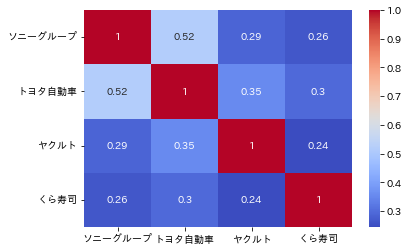

In [188]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

## 複数株式（ポートフォリオ）のリスク

In [120]:
# 現在のデータフレームを確認（対数利益率）
df.head()

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04 00:00:00+09:00,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+09:00,-0.004404,-0.022093,-0.012392,0.015723
2010-01-06 00:00:00+09:00,0.008788,0.023378,0.001780,0.026058
2010-01-07 00:00:00+09:00,0.000000,-0.011620,-0.040644,0.009695
2010-01-08 00:00:00+09:00,0.023776,0.028171,-0.004455,-0.026199


In [189]:
# 10
# 保有割合
weight = np.array([0.25, 0.25, 0.25, 0.25])

# ポートフォリオの分散
np.dot(weight.T, np.dot(df.cov() * 246, weight))

0.044478891664449086

In [190]:
# 10
# ポートフォリオのリスク（標準偏差）
np.dot(weight.T, np.dot(df.cov() * 246, weight)) **0.05

0.855869791325447

## 分散可能なリスクと分散不可能なリスクの計算(今回はしない、参考コード)

In [123]:
# ソニー、 トヨタ自動車、　ヤクルト、 くら寿司
# start = '2010-01-01'
# end = '2022-12-31'
# tickers = {'ソニーグループ':'6758.T', 'トヨタ自動車':'7203.T', 'ヤクルト':'2267.T', 'くら寿司':'2695.T'}

# df = pd.DataFrame()
# for ticker, number in tickers.items():
#     df[ticker] = yf.download(number, start, end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [124]:
# df_log = np.log(df / df.shift(1))
# df_log

,ソニーグループ,トヨタ自動車,ヤクルト,くら寿司
Date,,,,
2010-01-04 00:00:00+09:00,NaN,NaN,NaN,NaN
2010-01-05 00:00:00+09:00,-0.004404,-0.022093,-0.012392,0.015723
2010-01-06 00:00:00+09:00,0.008788,0.023378,0.001780,0.026058
2010-01-07 00:00:00+09:00,0.000000,-0.011621,-0.040644,0.009696
2010-01-08 00:00:00+09:00,0.023776,0.028171,-0.004454,-0.026199
...,...,...,...,...
2022-12-26 00:00:00+09:00,0.002937,0.002746,0.000000,-0.014694
2022-12-27 00:00:00+09:00,-0.007358,-0.003022,0.005737,0.006557
2022-12-28 00:00:00+09:00,0.002459,0.000825,0.007977,-0.011504


ポートフォリオの共分散＊リスク

In [125]:
# weights = np.array([0.25, 0.25, 0.25, 0.25])

# pfolio_var = np.dot(weights.T, np.dot(df_log.cov() * 246, weights))
# pfolio_var

0.04447888916844953

### ポートフォリオの分散可能リスクと非分散可能リスクの計算

年間利益率に対する各銘柄の分散:

In [126]:
# sony_var = df_log['ソニーグループ'].var() * 246
# toyota_var = df_log['トヨタ自動車'].var() * 246
# yakuruto_var = df_log['ヤクルト'].var() * 246
# kurazusi_var = df_log['くら寿司'].var() * 246

# print(sony_var)
# print(toyota_var)
# print(yakuruto_var)
# print(kurazusi_var)

分散可能なリスクの計算:

In [127]:
# dr = pfolio_var - (weights[0] ** 2 * sony_var) - (weights[1] ** 2 * toyota_var) - (weights[2] ** 2 * yakuruto_var)- (weights[3] ** 2 * kurazusi_var)
# dr

In [128]:
# print (str(round(dr*100, 3)) + ' %')

分散不可能なリスクの計算：個別株のリスク（分散の合計）

In [129]:
# n_dr_1 = pfolio_var - dr
# n_dr_1

In [130]:
# n_dr_2 = (weights[0] ** 2 * sony_var) + (weights[1] ** 2 * toyota_var) + (weights[2] ** 2 * yakuruto_var) + (weights[3] ** 2 * kurazusi_var)
# n_dr_2

保有割合を変更した場合

In [131]:
# weights = np.array([0.4, 0.2, 0.1, 0.3])

# pfolio_var = np.dot(weights.T, np.dot(df_log.cov() * 246, weights))
# pfolio_var

分散可能なリスクの計算:

In [132]:
# dr = pfolio_var - (weights[0] ** 2 * sony_var) - (weights[1] ** 2 * toyota_var) - (weights[2] ** 2 * yakuruto_var)- (weights[3] ** 2 * kurazusi_var)
# dr

In [133]:
# print (str(round(dr*100, 3)) + ' %')

分散不可能なリスクの計算：個別株のリスク（分散の合計）

In [192]:
# n_dr_2 = pfolio_var - dr
# n_dr_2

In [135]:
# n_dr_2 = (weights[0] ** 2 * sony_var) + (weights[1] ** 2 * toyota_var) + (weights[2] ** 2 * yakuruto_var) + (weights[3] ** 2 * kurazusi_var)
# n_dr_2

## 効率的フロンティア（ポートフォリオの最適化）

In [136]:
# 3-1
# ソニー、 ヤクルト
start = '2010-01-01'
end = '2022-12-31'
tickers = {'ソニーグループ':'6758.T', 'ヤクルト':'2267.T'}

df = pd.DataFrame()
for ticker, number in tickers.items():
    df[ticker] = yf.download(number, start, end)['Adj Close']

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ソニーグループ,ヤクルト
Date,,
2010-01-04 00:00:00+09:00,2425.539062,2612.402344
2010-01-05 00:00:00+09:00,2414.881836,2580.230225
2010-01-06 00:00:00+09:00,2436.197021,2584.826904
2010-01-07 00:00:00+09:00,2436.197021,2481.874512
2010-01-08 00:00:00+09:00,2494.815430,2470.843506


In [137]:
# 3-2
df_log = np.log(df / df.shift(1))
df_log.head()

,ソニーグループ,ヤクルト
Date,,
2010-01-04 00:00:00+09:00,NaN,NaN
2010-01-05 00:00:00+09:00,-0.004403,-0.012392
2010-01-06 00:00:00+09:00,0.008788,0.001780
2010-01-07 00:00:00+09:00,0.000000,-0.040644
2010-01-08 00:00:00+09:00,0.023777,-0.004455


様々な保有割合を算出する方法

In [138]:
#3-3 様々なウェイトを算出（この方法だと合計が1にならない）　悪い例
df_num = len(tickers)
arr = np.random.random(2)
arr

array([0.5034945 , 0.83421178])

In [ ]:
#3-3 様々ウェイトを算出（合計を1にする方法） 良い例
df_num = len(tickers)
weights = np.random.random(df_num)
# ↓ weights = weights / np.sum(weights)
weights /= np.sum(weights)
weights

In [140]:
# 3-3 ポートフォリオの利益率
(np.sum(weights * df_log.mean())) * 246

0.09506343787670675

In [193]:
# 3-3:ポートフォリオの分散
np.dot(weights.T, np.dot(df_log.cov() * 246, weights))

0.06864250237345815

In [194]:
# 3-3 ポートフォリオのボラティリティ（標準偏差）
np.sqrt(np.dot(weights.T, np.dot(df_log.cov() * 246, weights)))

0.26199714191849144

In [195]:
# 3-4 1000通りの保有割合を試してみて、効率的な保有割合を探索する
pfolia_returns = []
pfolio_std = []

for x in range(1000):
    weights = np.random.random(df_num)
    weights /= np.sum(weights)
    pfolia_returns.append((np.sum(weights * df_log.mean())) * 246)
    pfolio_std.append(np.sqrt(np.dot(weights.T, np.dot(df_log.cov() * 246, weights))))

pfolia_returns = np.array(pfolia_returns)
pfolio_std = np.array(pfolio_std)
portfolios = pd.DataFrame({'returns':pfolia_returns, 'std':pfolio_std})
portfolios

,returns,std
0,0.105924,0.298209
1,0.097076,0.250057
2,0.100506,0.253946
3,0.101752,0.260376
4,0.103131,0.270308
...,...,...
995,0.099264,0.250137
996,0.100429,0.253632
997,0.100205,0.252780
998,0.103256,0.271342


<AxesSubplot:xlabel='std', ylabel='returns'>

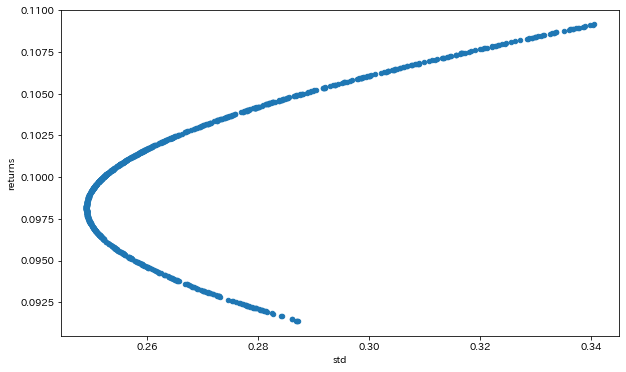

In [196]:
portfolios.plot(x='std', y='returns', kind='scatter', figsize=(10, 6))

## 様々な銘柄同士の最適ポートフォリオが確認できるように関数化（応用編）

In [197]:
def best_portfolios(tickers, start, end):
    
    # データ読み込み
    df = pd.DataFrame()
    for ticker, number in tickers.items():
        df[ticker] = yf.download(number, start, end)['Adj Close']
    
    # 対数利益率を算出
    df_log = np.log(df / df.shift(1))
    # ポートフォリオの数を格納
    df_num = len(tickers)
    # ウェイトを入れる空のリストを用意
    weight_list = []
    weight_total = []
    # 利益率を入れる箱
    pfolia_returns = []
    # リスクを入れる箱
    pfolio_std = []
    #1000通りの重みを試す。
    for x in range(1000):            
        weights = np.random.random(df_num)
        weights /= np.sum(weights)
        pfolia_returns.append((np.sum(weights * df_log.mean())) * 246)
        pfolio_std.append(np.sqrt(np.dot(weights.T, np.dot(df_log.cov() * 246, weights))))
        # 保有割合
        for i in range(len(tickers)):
            weight_list.append(weights[i])
        
        weight_total.append(weight_list)
        weight_list = []
        
    # 格納したデータを配列に変換
    pfolia_returns = np.array(pfolia_returns)
    pfolio_std = np.array(pfolio_std)
    weight_total = np.array(weight_total)
    
    # 保有割合をデータフレームに変換
    weight_df = pd.DataFrame(weight_total, columns=df.columns)
    # 利益率とリスクをデータフレームに変換
    portfolios_plus = pd.DataFrame({'returns':pfolia_returns,'std':pfolio_std,})
    # 保有割合と利益率とリスクを結合
    portfolios_plus = pd.merge(weight_df, portfolios_plus, left_index=True, right_index=True)
    portfolios_plus = portfolios_plus.sort_values('returns').reset_index(drop=True)
    # グラフ化
    portfolios_plus.plot(x='std', y='returns', kind='scatter', figsize=(10, 6))
    return portfolios_plus

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,トヨタ自動車,ヤクルト,くら寿司,ソニーグループ,シャープ,returns,std
0,0.028980,0.087464,0.048837,0.037031,0.797688,-0.125516,0.403341
1,0.119218,0.038576,0.082163,0.143456,0.616588,-0.072063,0.343325
2,0.153218,0.068027,0.105955,0.073845,0.598955,-0.067394,0.332287
3,0.059757,0.116602,0.021526,0.228530,0.573586,-0.061279,0.333269
4,0.036946,0.159361,0.103242,0.137527,0.562925,-0.057086,0.320406
...,...,...,...,...,...,...,...
995,0.226072,0.009547,0.414174,0.333385,0.016822,0.109172,0.233697
996,0.161876,0.193597,0.300646,0.343389,0.000492,0.109293,0.221044
997,0.352908,0.035622,0.503449,0.092832,0.015188,0.109309,0.227159
998,0.058749,0.101247,0.363082,0.472460,0.004462,0.112251,0.242366


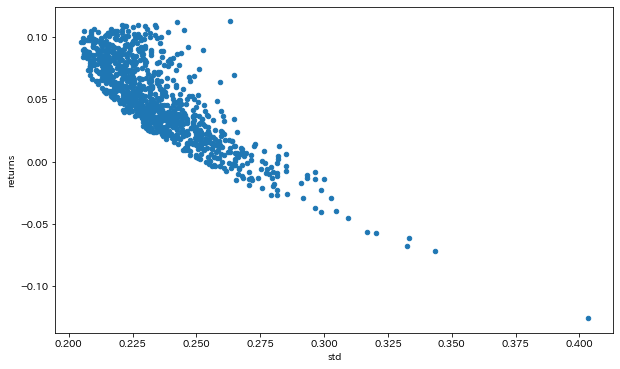

In [198]:
start = '2010-01-01'
end = '2022-12-31'
tickers = {'トヨタ自動車':'7203.T', 'ヤクルト':'2267.T', 'くら寿司':'2695.T', 'ソニーグループ':'6758.T', 'シャープ':'6753.T'}

# ベストポートフォリオを探求するための関数
df = best_portfolios(tickers, start, end)
df

# 次回もお楽しみに！